<a href="https://colab.research.google.com/github/NilarghyaDebnath/Machine-Learning/blob/main/UnsupervisedLearing_MallCustomerSegementation.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans
import os

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
df = pd.read_csv('/content/drive/MyDrive/Mall_Customers.csv')

In [ ]:
df.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [ ]:
df.tail()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
195,196,Female,35,120,79
196,197,Female,45,126,28
197,198,Male,32,126,74
198,199,Male,32,137,18
199,200,Male,30,137,83


In [ ]:
df.shape

(200, 5)

In [ ]:
df.describe()

,CustomerID,Age,Annual Income (k$),Spending Score (1-100)
count,200.000000,200.000000,200.000000,200.000000
mean,100.500000,38.850000,60.560000,50.200000
std,57.879185,13.969007,26.264721,25.823522
min,1.000000,18.000000,15.000000,1.000000
25%,50.750000,28.750000,41.500000,34.750000
50%,100.500000,36.000000,61.500000,50.000000
75%,150.250000,49.000000,78.000000,73.000000
max,200.000000,70.000000,137.000000,99.000000


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   CustomerID              200 non-null    int64 
 1   Gender                  200 non-null    object
 2   Age                     200 non-null    int64 
 3   Annual Income (k$)      200 non-null    int64 
 4   Spending Score (1-100)  200 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 7.9+ KB


In [ ]:
df.isnull().sum()

CustomerID                0
Gender                    0
Age                       0
Annual Income (k$)        0
Spending Score (1-100)    0
dtype: int64

In [ ]:
df.columns.tolist()

['CustomerID', 'Gender', 'Age', 'Annual Income (k$)', 'Spending Score (1-100)']

In [ ]:
df.Gender.value_counts()

Female    112
Male       88
Name: Gender, dtype: int64

#visualize each of the input feature and their distributions

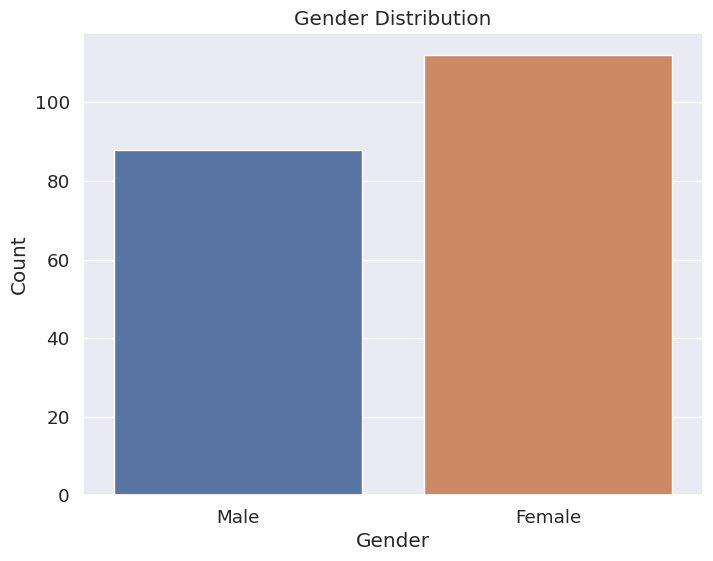

In [ ]:
#Gender

# Customizing the color palette
sns.set_palette("Set2")

# Changing the plot style
sns.set_style("whitegrid")

# Changing plot size
plt.figure(figsize=(8, 6))

# Adjusting font size
sns.set(font_scale=1.2)

# Plotting the countplot with hue
sns.countplot(x="Gender", hue="Gender", data=df)

# Adding title and labels
plt.title("Gender Distribution")
plt.xlabel("Gender")
plt.ylabel("Count")

plt.show()


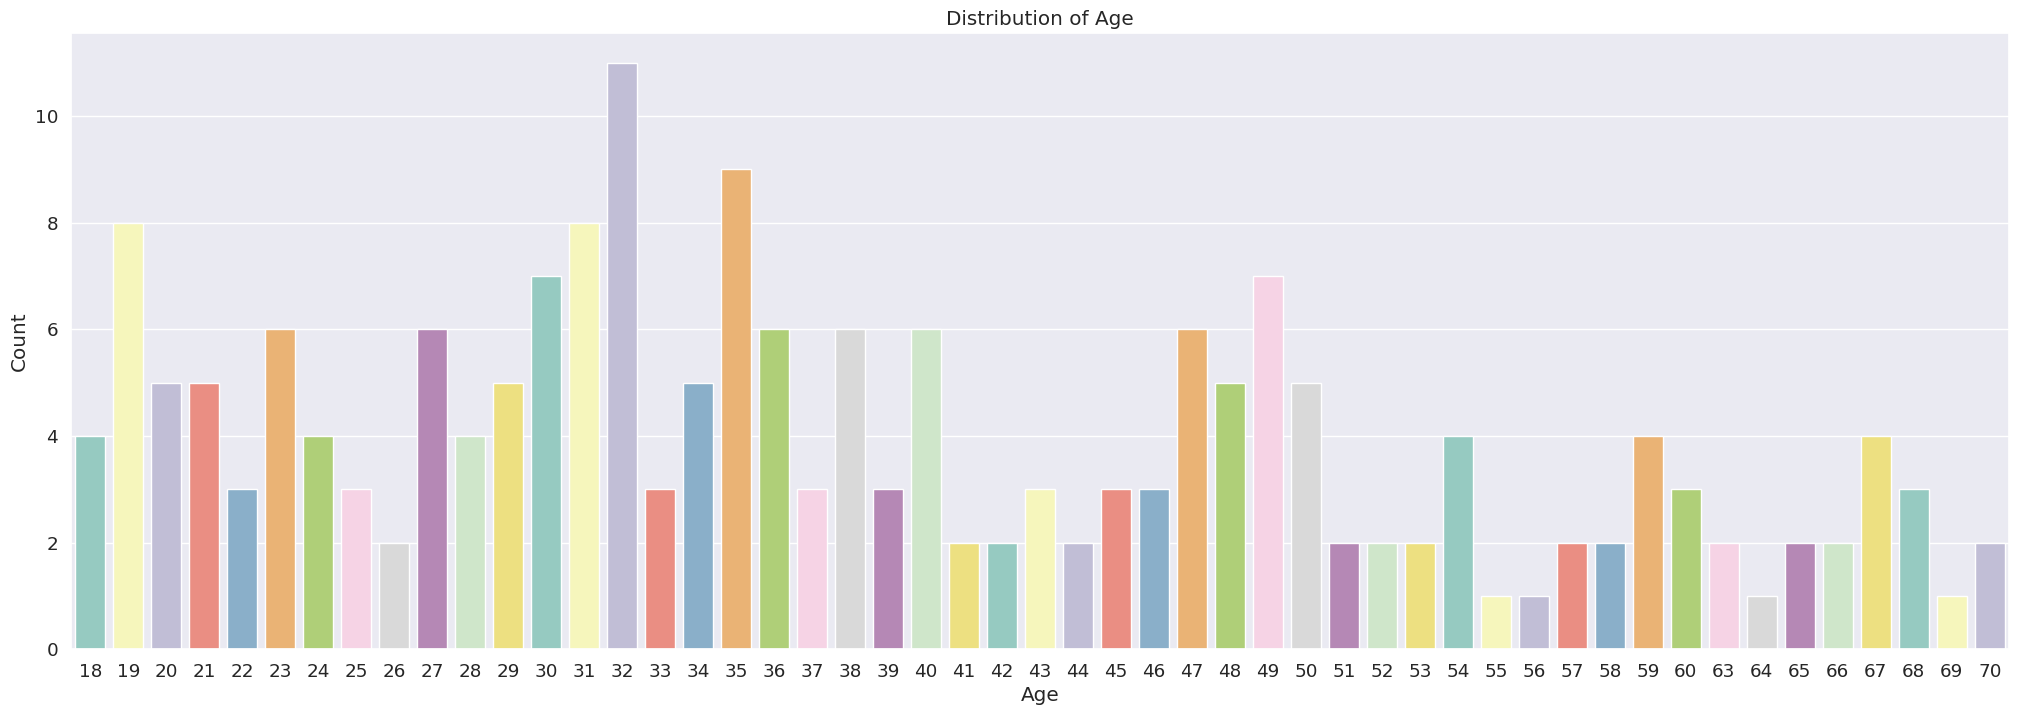

In [ ]:
#Countplot of Age

# Customizing the color palette
sns.set_palette("husl")

# Changing plot size
plt.figure(figsize=(25,8))

# Plotting the countplot
sns.countplot(x="Age", hue = "Age", legend = False, data=df, palette = 'Set3')

# Adding title and labels
plt.title("Distribution of Age")
plt.xlabel("Age")
plt.ylabel("Count")

plt.show()

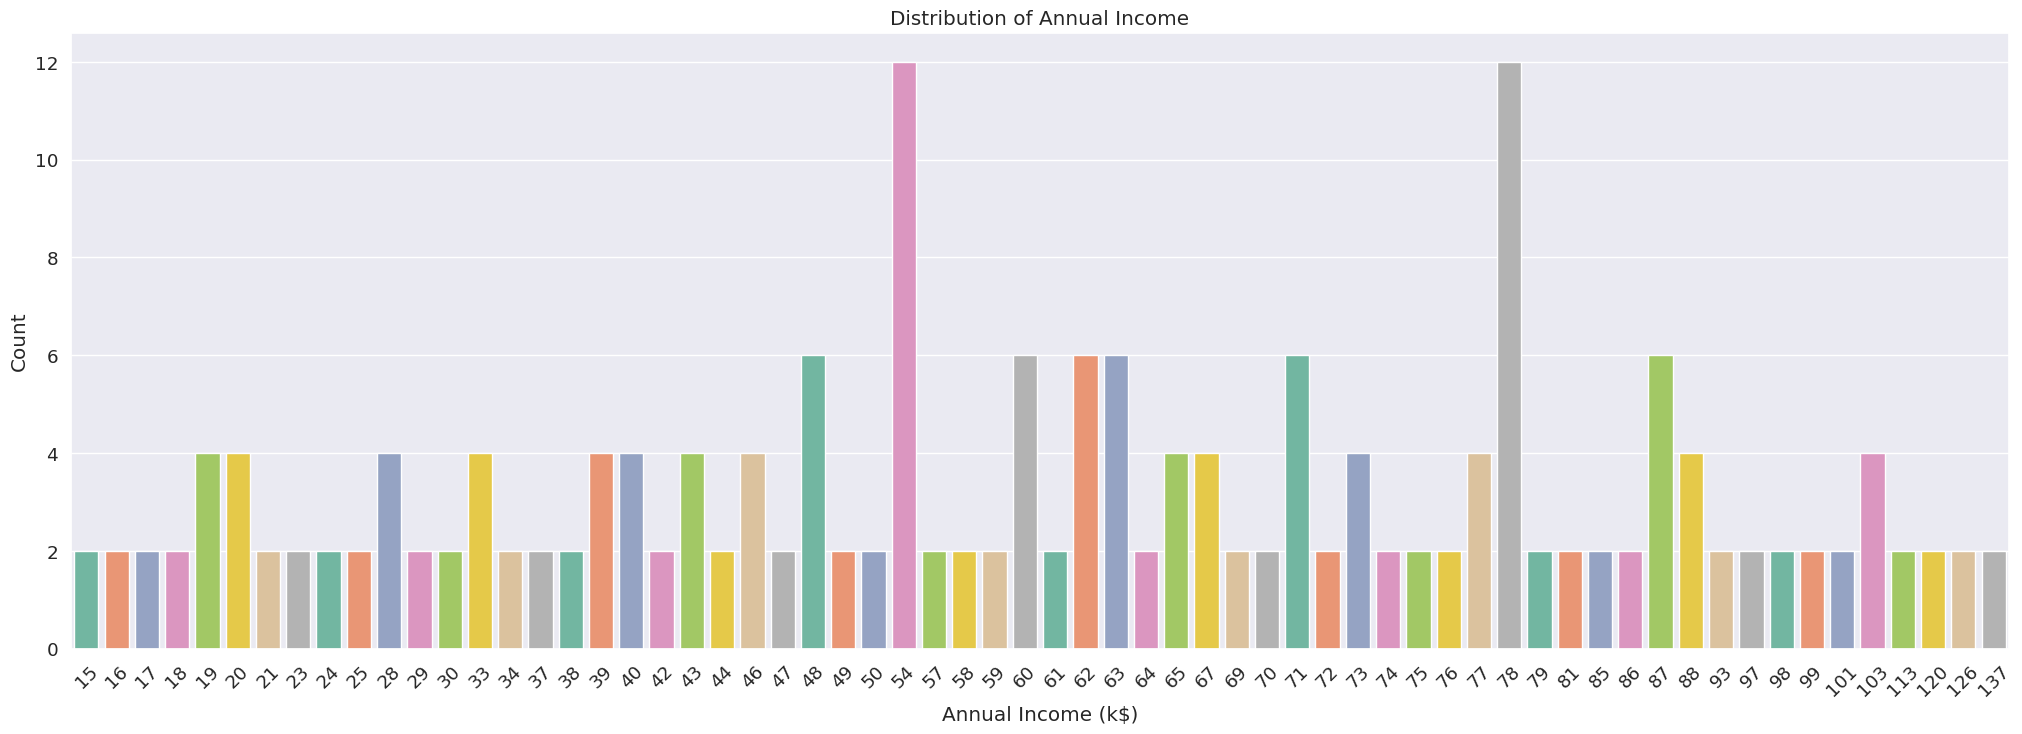

In [ ]:
#Annual income

# Customizing the color palette
sns.set_palette("husl")

# Changing the plot style
sns.set_style("darkgrid")

# Changing plot size
plt.figure(figsize=(25, 8))

# Plotting the countplot
sns.countplot(x="Annual Income (k$)",hue = "Annual Income (k$)", legend = False, data=df, palette="Set2")

# Rotating x-axis labels
plt.xticks(rotation=45)

# Adding title and labels
plt.title("Distribution of Annual Income")
plt.xlabel("Annual Income (k$)")
plt.ylabel("Count")

plt.show()

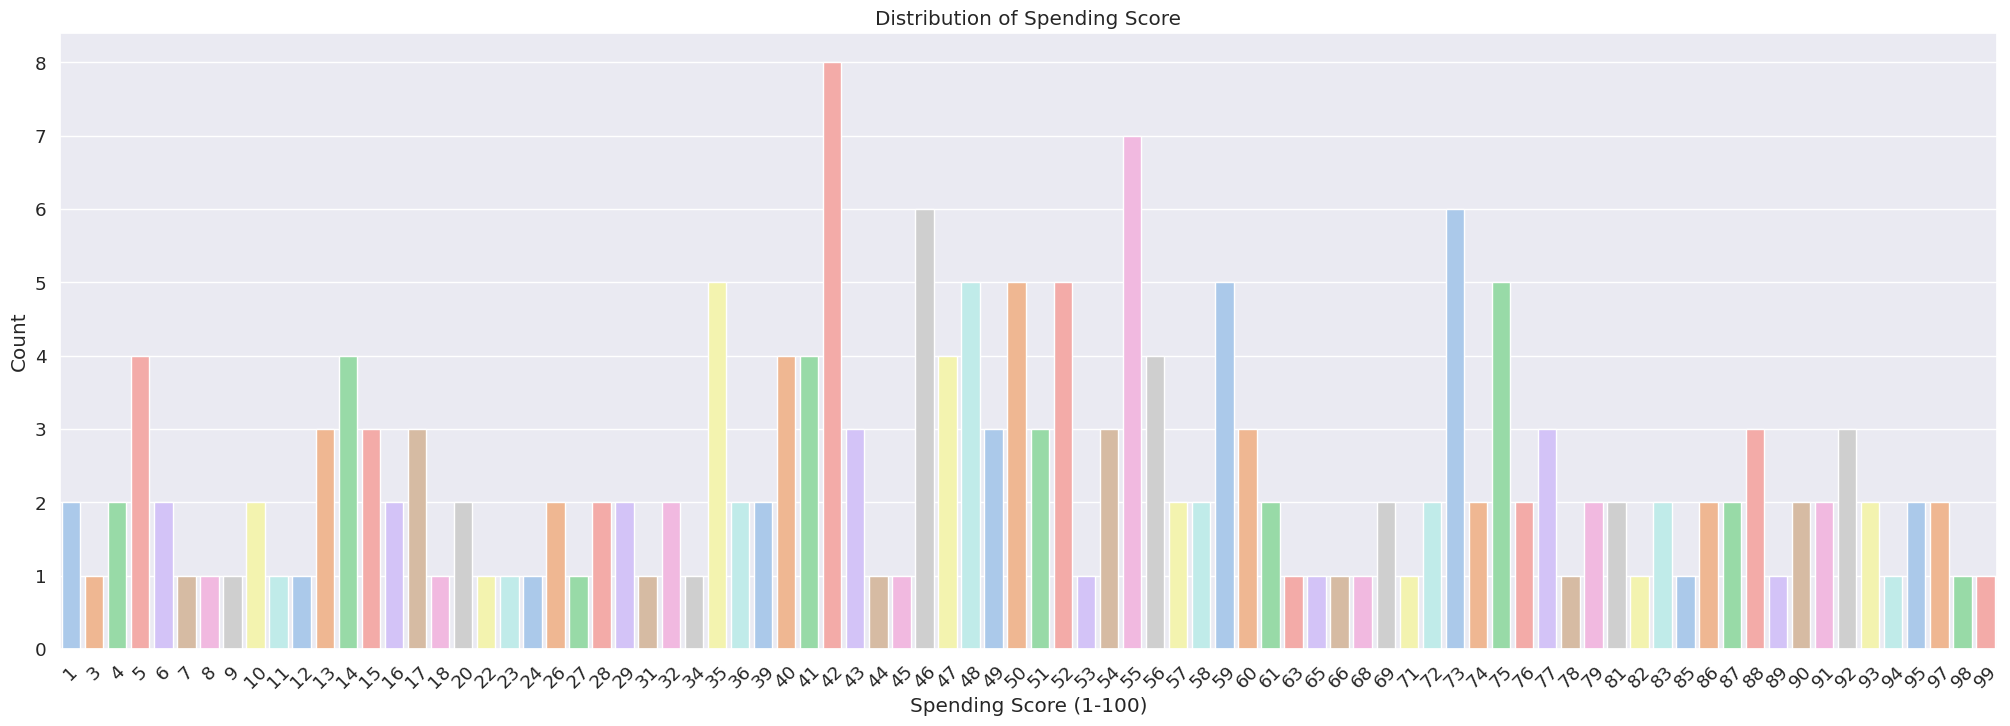

In [ ]:
#spending score of customers

# Changing plot size
plt.figure(figsize=(25, 8))

# Plotting the countplot
sns.countplot(x="Spending Score (1-100)", hue = "Spending Score (1-100)", legend = False, data=df,palette="pastel")

# Rotating x-axis labels
plt.xticks(rotation=45)

# Adding title and labels
plt.title("Distribution of Spending Score")
plt.xlabel("Spending Score (1-100)")
plt.ylabel("Count")

plt.show()

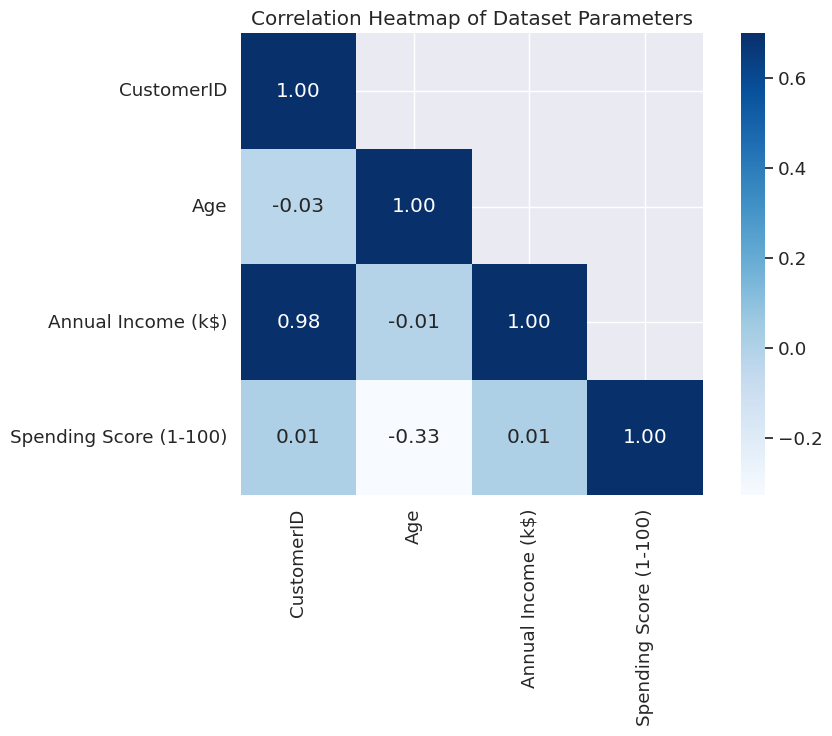

In [ ]:
# Finding correaltion between all the parameters in the dataset.
# Calculate the correlation matrix
corr_matrix = df.corr(numeric_only=True)

# Create a mask for the upper triangle
obj = np.array(corr_matrix)
obj[np.tril_indices_from(obj)] = False


# Changing plot size
fig,ax = plt.subplots(figsize=(10,6))

# Plotting the correlation heatmap with masked upper triangle
sns.set_style("white")
sns.heatmap(corr_matrix, annot=True, vmax=.7, square=True, cmap="Blues", fmt=".2f", mask=obj, alpha=1.0)
# Adding title
plt.title("Correlation Heatmap of Dataset Parameters")

plt.show()


In [ ]:
#K-Means Clustering
#Taking annual income and spending score in x to make clusters
x1=df.iloc[:,[3,4]]
# dispalying first 5 rows of x
x1.head()

,Annual Income (k$),Spending Score (1-100)
0,15,39
1,15,81
2,16,6
3,16,77
4,17,40


In [ ]:
from yellowbrick.cluster import SilhouetteVisualizer
from sklearn.metrics import silhouette_score

def silhouette_analysis(n,features):
  for n_clusters in range(2,n):
    km = KMeans(n_clusters=n_clusters,init="k-means++",max_iter=300,n_init=10,random_state=0)
    preds = km.fit_predict(features)
    centers = km.cluster_centers_

    score = silhouette_score(features, preds, metric='euclidean')
    print('For n_clusters = {}, silhouette score is {}'.format(n_clusters, score))

    visualizer = SilhouetteVisualizer(km)

    visualizer.fit(features)
    visualizer.poof()

For n_clusters = 2, silhouette score is 0.2968969162503008


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but KMeans was fitted with feature names
  warnings.warn(


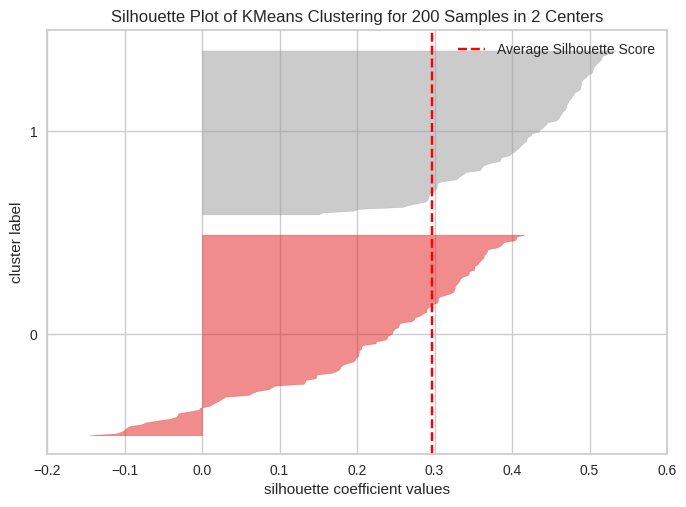

For n_clusters = 3, silhouette score is 0.46761358158775435


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but KMeans was fitted with feature names
  warnings.warn(


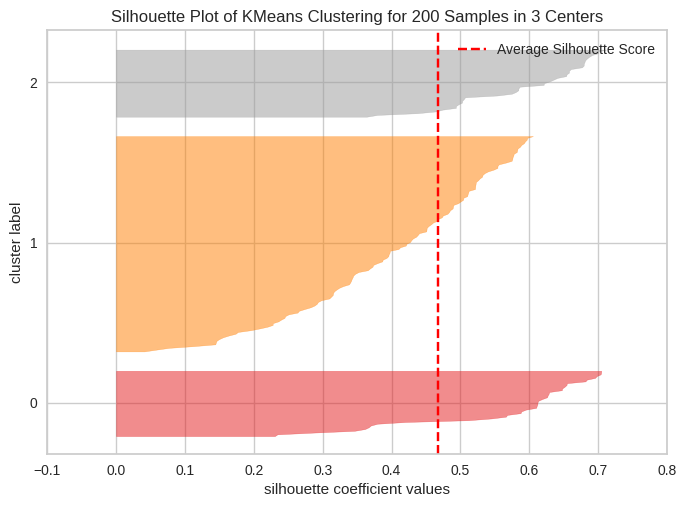

For n_clusters = 4, silhouette score is 0.4931963109249047


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but KMeans was fitted with feature names
  warnings.warn(


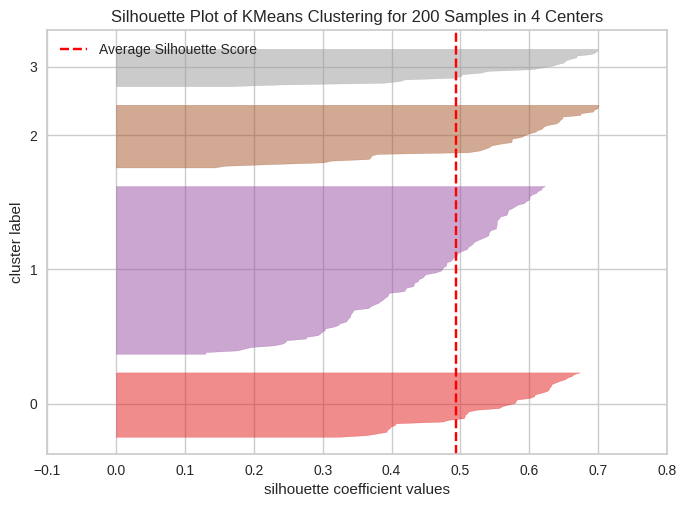

For n_clusters = 5, silhouette score is 0.553931997444648


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but KMeans was fitted with feature names
  warnings.warn(


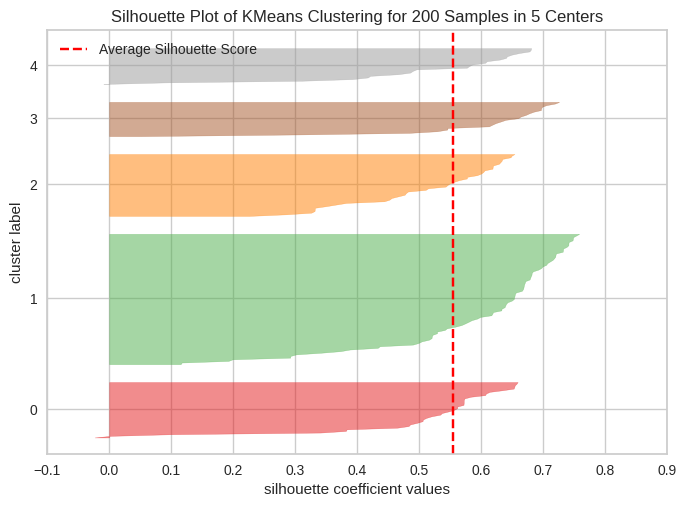

For n_clusters = 6, silhouette score is 0.5379675585622219


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but KMeans was fitted with feature names
  warnings.warn(


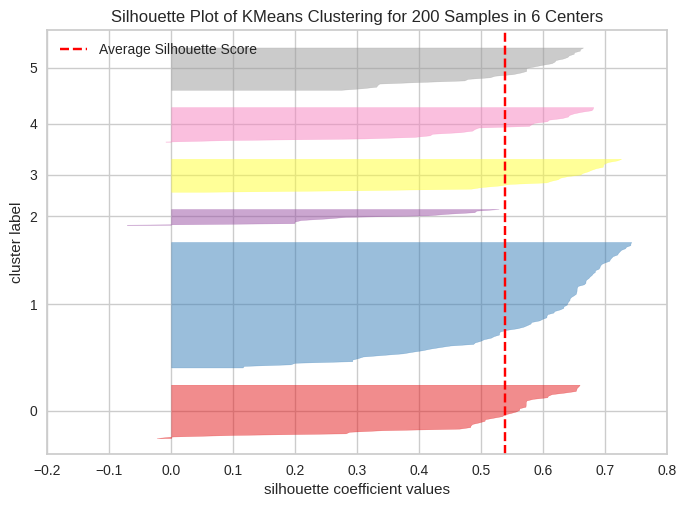

For n_clusters = 7, silhouette score is 0.5264283703685728


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but KMeans was fitted with feature names
  warnings.warn(


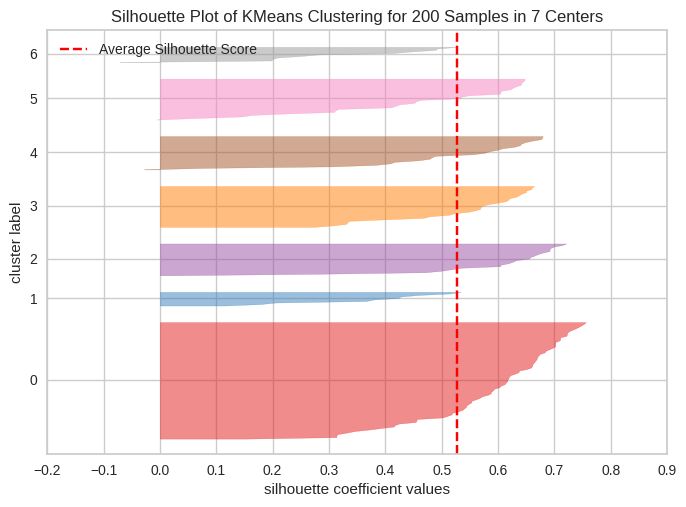

For n_clusters = 8, silhouette score is 0.45704384633565154


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but KMeans was fitted with feature names
  warnings.warn(


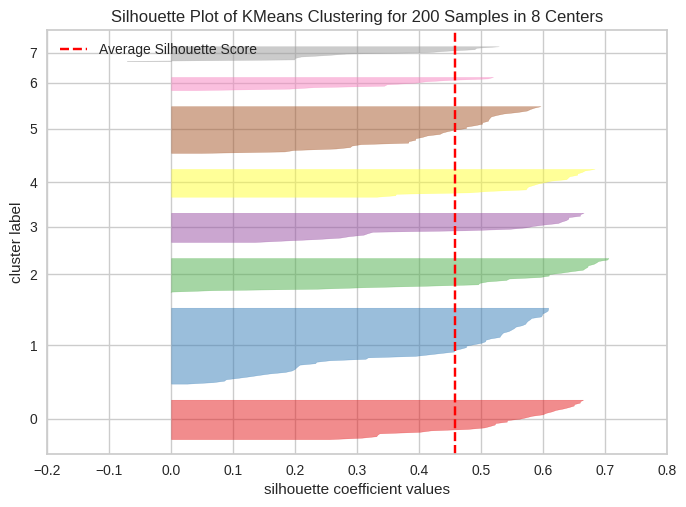

For n_clusters = 9, silhouette score is 0.4563032021725485


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but KMeans was fitted with feature names
  warnings.warn(


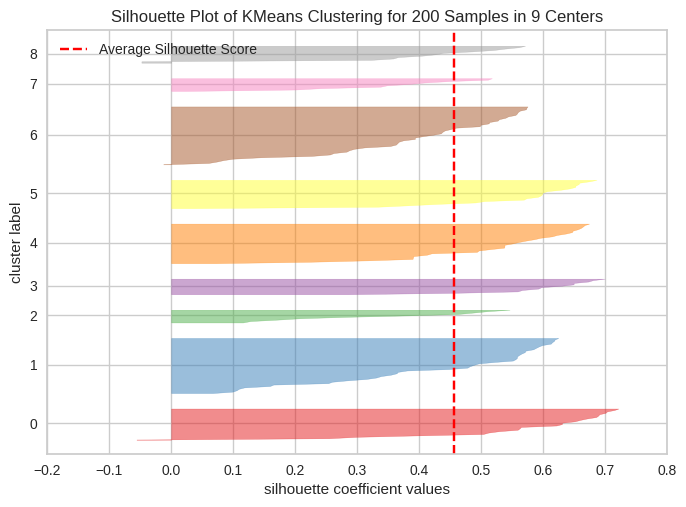

For n_clusters = 10, silhouette score is 0.4492169169017592


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but KMeans was fitted with feature names
  warnings.warn(


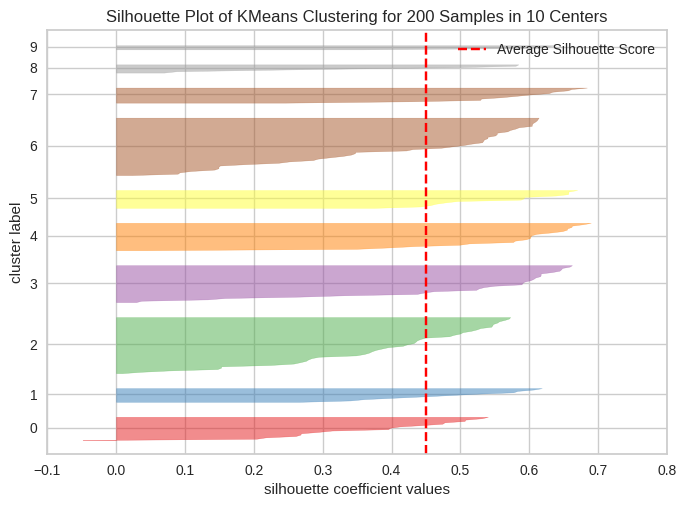

In [ ]:
silhouette_analysis(11,x1)

In [ ]:
wcss=[]
for i in range (1,11):
    kmeans=KMeans(n_clusters=i,init="k-means++",max_iter=300,n_init=10,random_state=0)
    kmeans.fit(x1)
    wcss.append(kmeans.inertia_)
print(wcss)

[269981.28, 181363.59595959593, 106348.37306211122, 73679.78903948836, 44448.4554479337, 37265.86520484346, 30259.65720728547, 25095.70320999756, 21830.041978049434, 20736.679938924128]


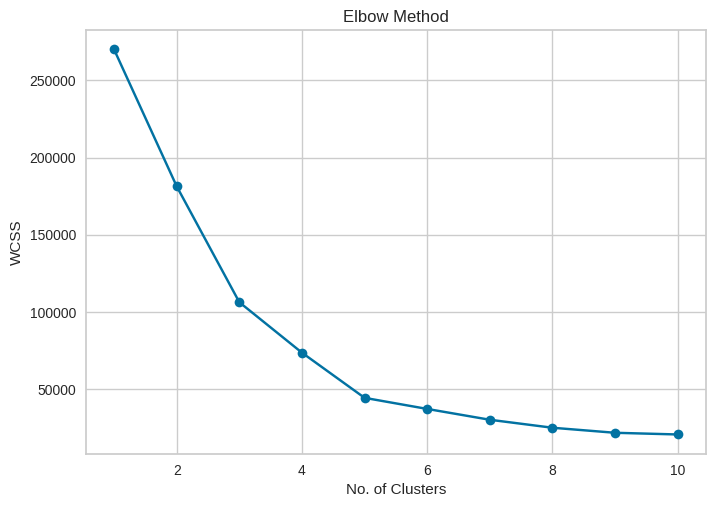

In [ ]:
# Visualising elbow method
plt.plot(range(1,11),wcss, marker='o')
plt.xlabel("No. of Clusters")
plt.ylabel("WCSS")
plt.title("Elbow Method")
plt.grid(True)
plt.show()

In [ ]:
# creating object kmeans of class KMeans()
kmeans=KMeans(n_clusters=5,init="k-means++",max_iter=300,n_init=10,random_state=0)

In [ ]:
y1_kmeans=kmeans.fit_predict(x1)
y1_kmeans
# it tells which data point belongs to which cluster (0,1,2,3,4)

array([4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3,
       4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 1,
       4, 3, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 0, 2, 1, 2, 0, 2, 0, 2,
       1, 2, 0, 2, 0, 2, 0, 2, 0, 2, 1, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2,
       0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2,
       0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2,
       0, 2], dtype=int32)

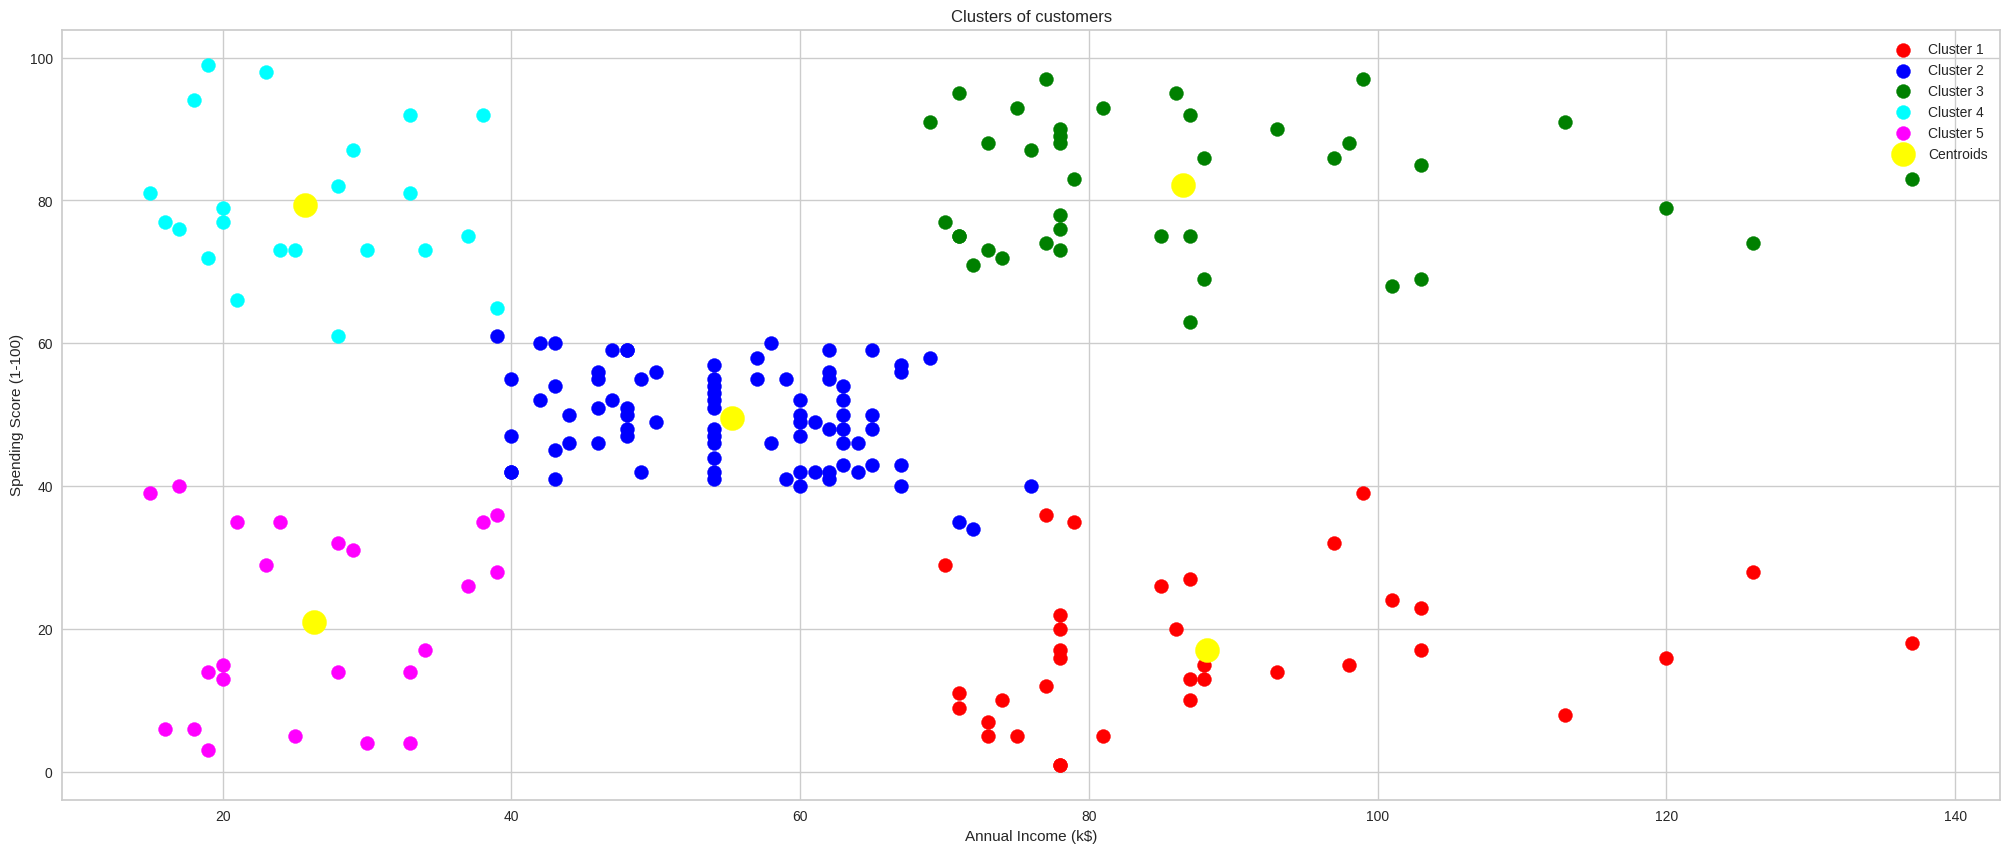

In [ ]:
x1=np.array(x1)
fig = plt.figure(figsize=(25, 10))
plt.scatter(x1[y1_kmeans == 0, 0], x1[y1_kmeans == 0, 1], s = 100, c = 'red', label = 'Cluster 1')
plt.scatter(x1[y1_kmeans == 1, 0], x1[y1_kmeans == 1, 1], s = 100, c = 'blue', label = 'Cluster 2')
plt.scatter(x1[y1_kmeans == 2, 0], x1[y1_kmeans == 2, 1], s = 100, c = 'green', label = 'Cluster 3')
plt.scatter(x1[y1_kmeans == 3, 0], x1[y1_kmeans == 3, 1], s = 100, c = 'cyan', label = 'Cluster 4')
plt.scatter(x1[y1_kmeans == 4, 0], x1[y1_kmeans == 4, 1], s = 100, c = 'magenta', label = 'Cluster 5')
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], s = 300, c = 'yellow', label = 'Centroids')
plt.title('Clusters of customers')
plt.xlabel('Annual Income (k$)')
plt.ylabel('Spending Score (1-100)')
plt.legend()

In [ ]:
#K-Means Clustering
x2=df.iloc[:,[2,3]]
# dispalying first 5 rows of x
x2.head()

,Age,Annual Income (k$)
0,19,15
1,21,15
2,20,16
3,23,16
4,31,17


For n_clusters = 2, silhouette score is 0.42620850066216065


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but KMeans was fitted with feature names
  warnings.warn(


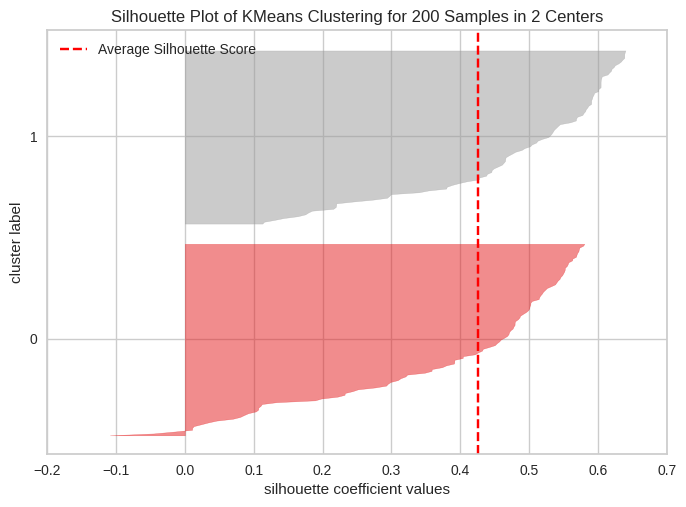

For n_clusters = 3, silhouette score is 0.4254725038202792


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but KMeans was fitted with feature names
  warnings.warn(


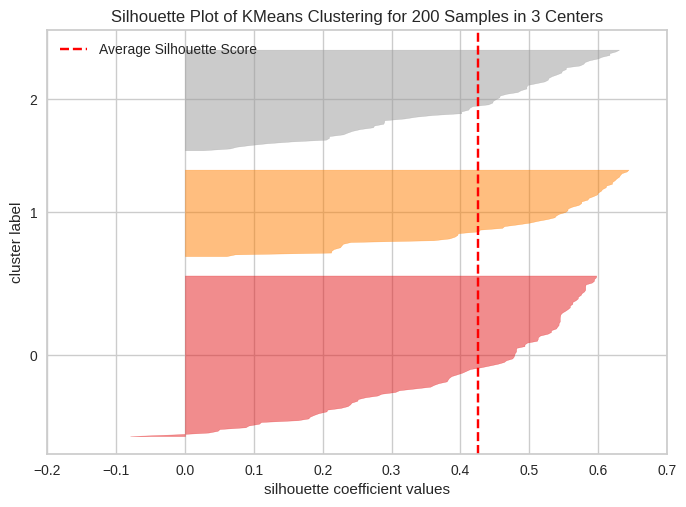

For n_clusters = 4, silhouette score is 0.43295184273333076


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but KMeans was fitted with feature names
  warnings.warn(


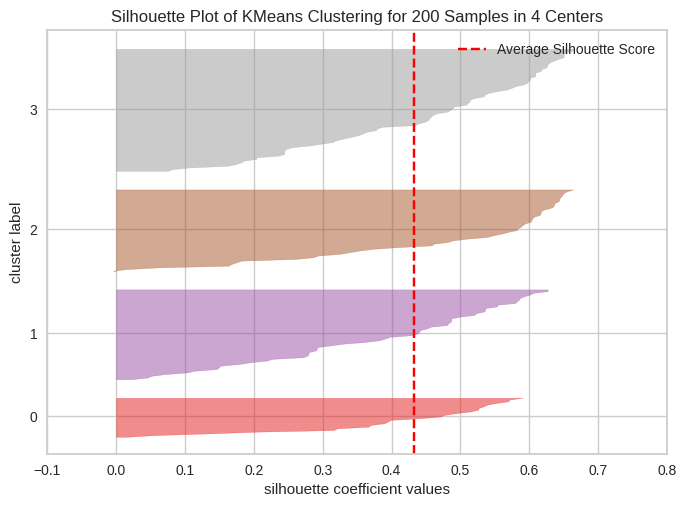

For n_clusters = 5, silhouette score is 0.4084065966030246


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but KMeans was fitted with feature names
  warnings.warn(


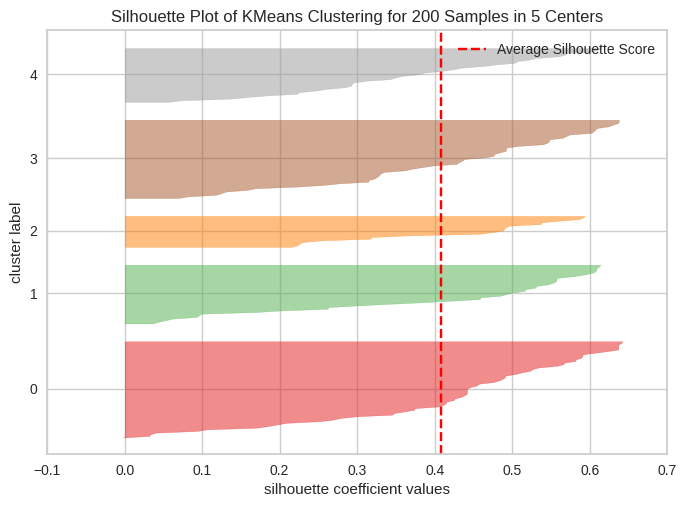

For n_clusters = 6, silhouette score is 0.3955316294977378


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but KMeans was fitted with feature names
  warnings.warn(


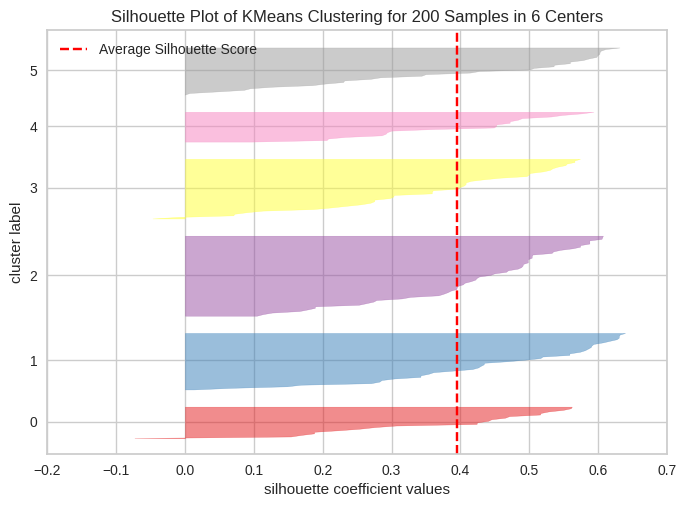

For n_clusters = 7, silhouette score is 0.38474084268711567


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but KMeans was fitted with feature names
  warnings.warn(


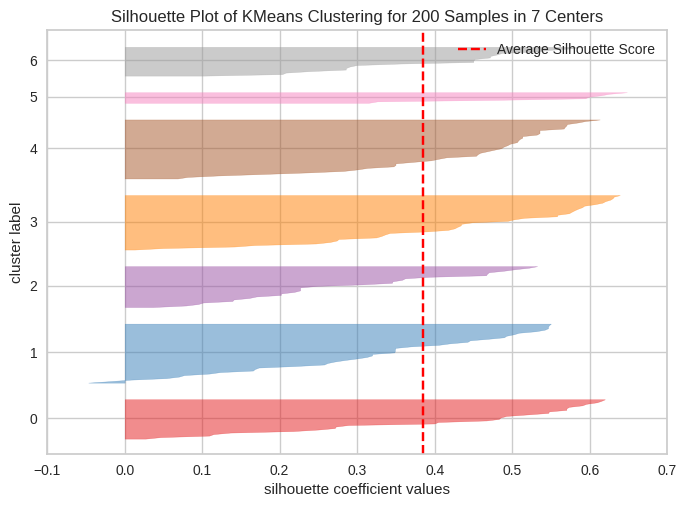

For n_clusters = 8, silhouette score is 0.39093303299008864


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but KMeans was fitted with feature names
  warnings.warn(


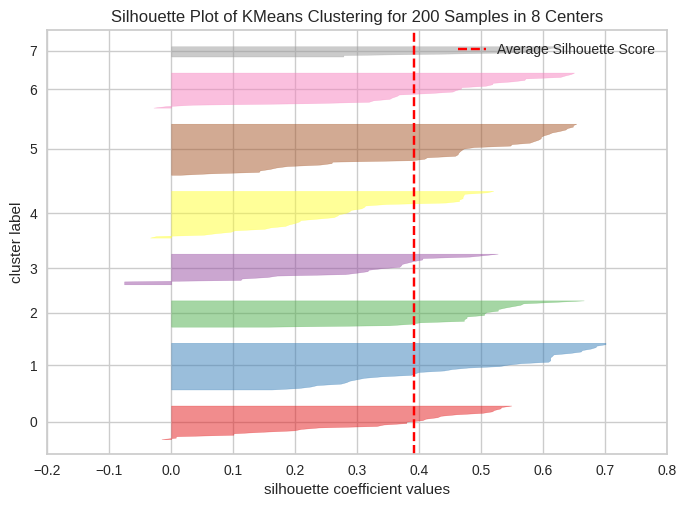

For n_clusters = 9, silhouette score is 0.39284783097277776


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but KMeans was fitted with feature names
  warnings.warn(


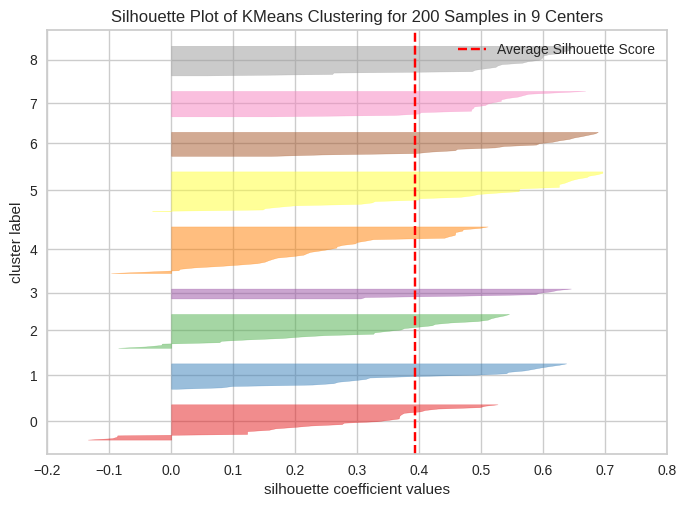

For n_clusters = 10, silhouette score is 0.4197158825680514


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but KMeans was fitted with feature names
  warnings.warn(


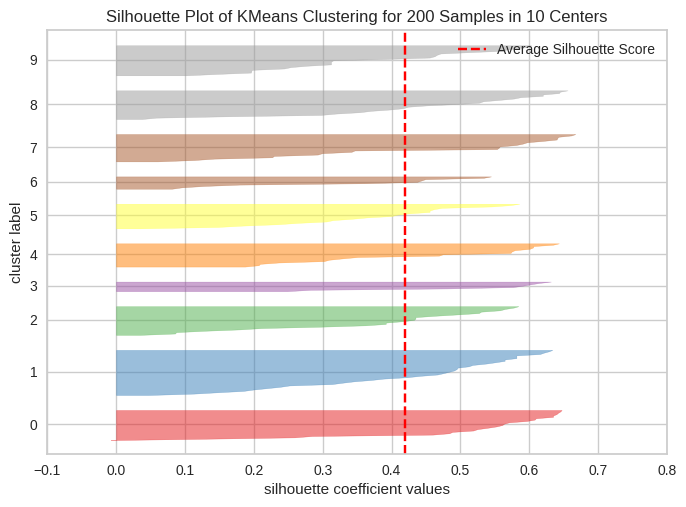

In [ ]:
silhouette_analysis(11,x2)

[176108.78000000003, 87121.56591478697, 59486.961439280356, 39529.88796736351, 31976.05381449878, 25443.166917679828, 21842.435556985554, 18748.83803296119, 16102.122253333775, 13697.901521027245]


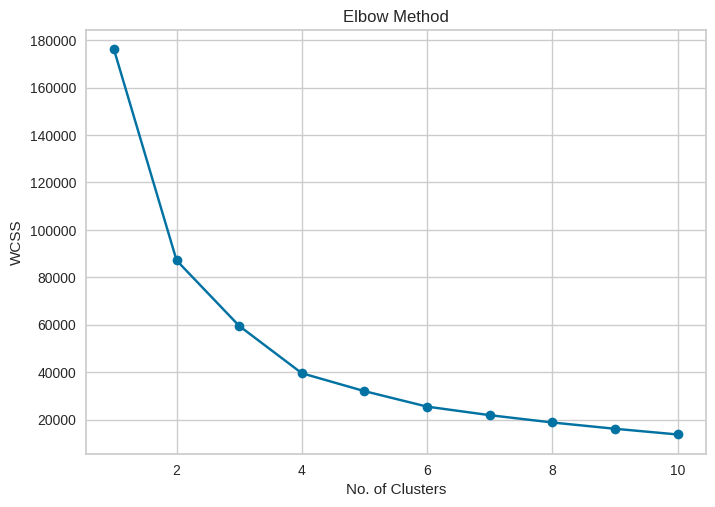

In [ ]:
wcss=[]
for i in range (1,11):
    kmeans=KMeans(n_clusters=i,init="k-means++",max_iter=300,n_init=10,random_state=0)
    kmeans.fit(x2)
    wcss.append(kmeans.inertia_)
print(wcss)

# Visualising elbow method
plt.plot(range(1,11),wcss,  marker='o')
plt.xlabel("No. of Clusters")
plt.ylabel("WCSS")
plt.title("Elbow Method")
plt.show()

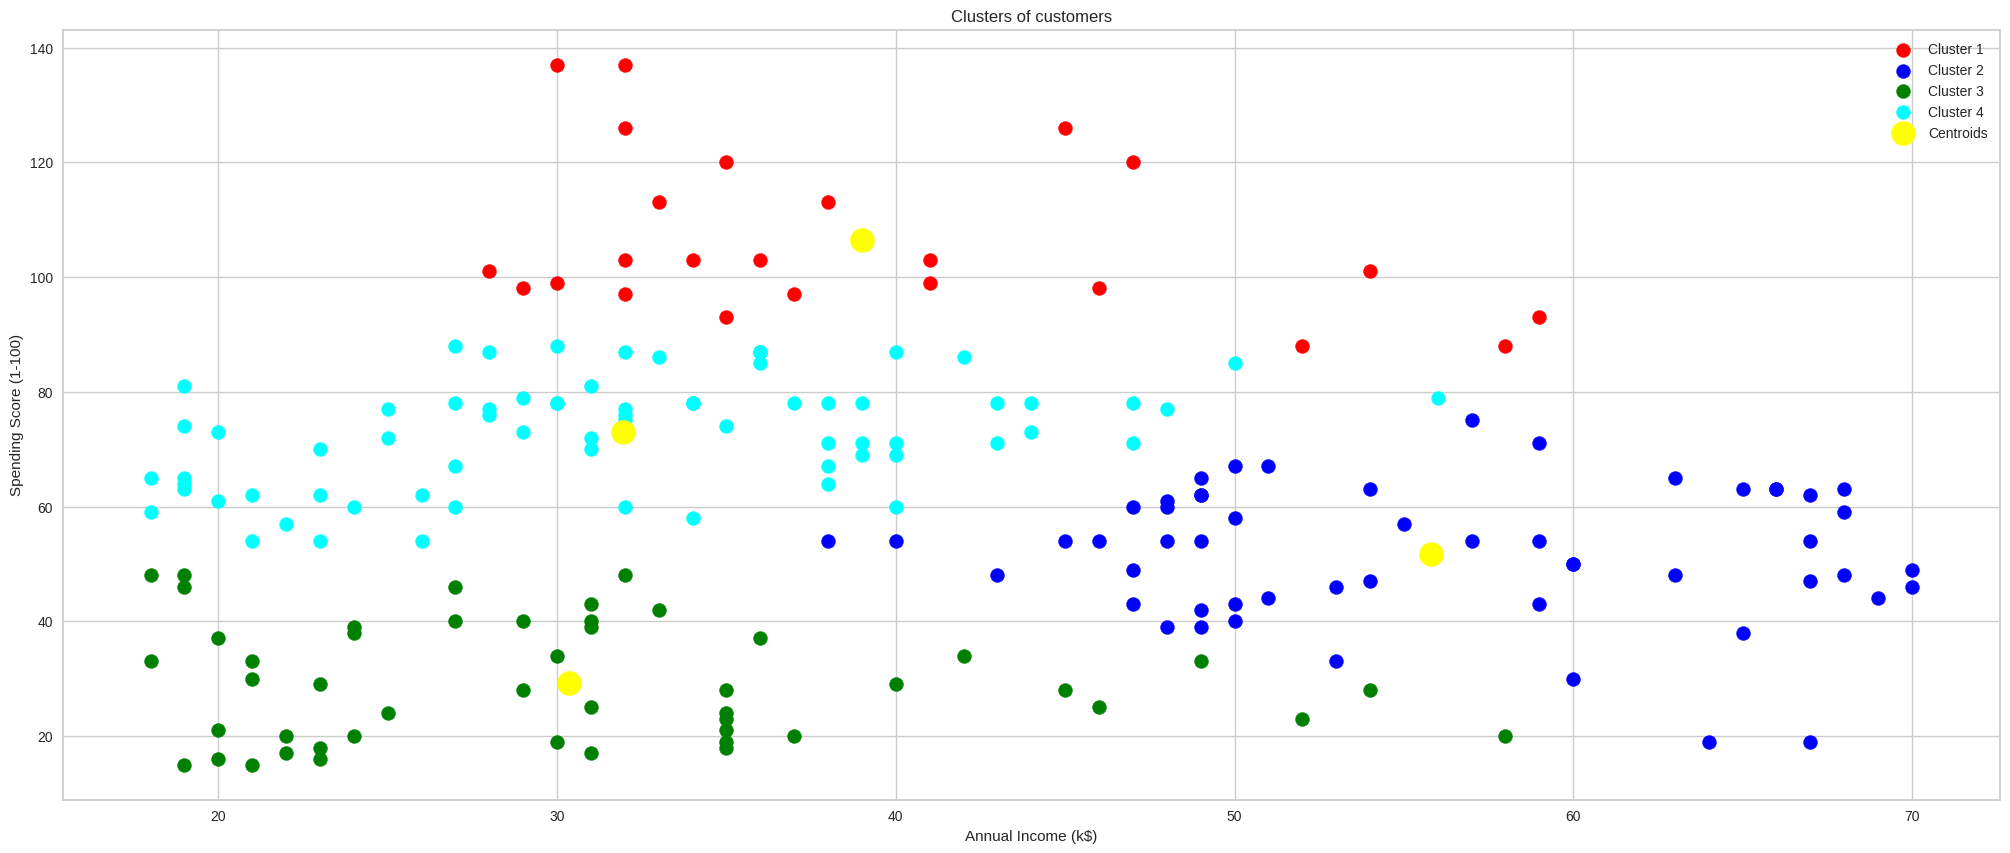

In [ ]:
# creating object kmeans of class KMeans()
kmeans=KMeans(n_clusters=4,init="k-means++",max_iter=300,n_init=10,random_state=0)
y2_kmeans=kmeans.fit_predict(x2)
x2=np.array(x2)
fig = plt.figure(figsize=(25, 10))
plt.scatter(x2[y2_kmeans == 0, 0], x2[y2_kmeans == 0, 1], s = 100, c = 'red', label = 'Cluster 1')
plt.scatter(x2[y2_kmeans == 1, 0], x2[y2_kmeans == 1, 1], s = 100, c = 'blue', label = 'Cluster 2')
plt.scatter(x2[y2_kmeans == 2, 0], x2[y2_kmeans == 2, 1], s = 100, c = 'green', label = 'Cluster 3')
plt.scatter(x2[y2_kmeans == 3, 0], x2[y2_kmeans == 3, 1], s = 100, c = 'cyan', label = 'Cluster 4')
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], s = 300, c = 'yellow', label = 'Centroids')
plt.title('Clusters of customers')
plt.xlabel('Annual Income (k$)')
plt.ylabel('Spending Score (1-100)')
plt.legend()
plt.show()

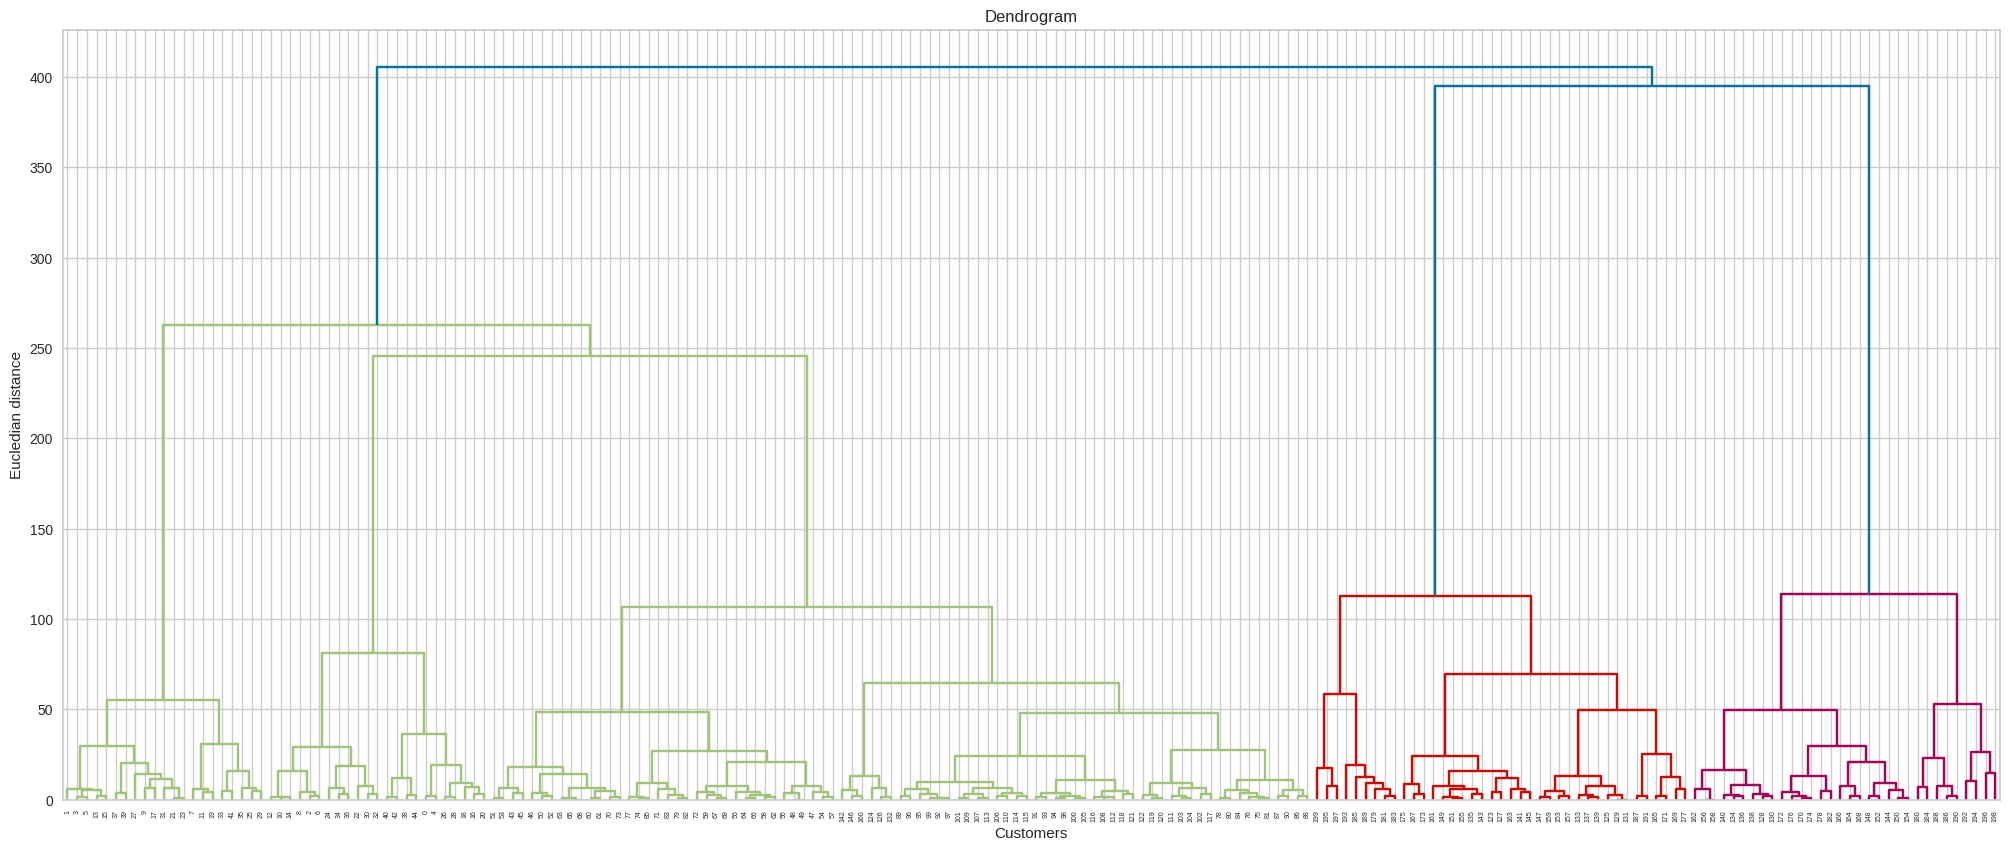

In [ ]:
import scipy.cluster.hierarchy as sch

# Visualising the dendrogram
fig = plt.figure(figsize=(25, 10))
dendrogram=sch.dendrogram(sch.linkage(x1,method='ward'))
plt.title("Dendrogram")
plt.xlabel("Customers")
plt.ylabel("Eucledian distance")
plt.show()

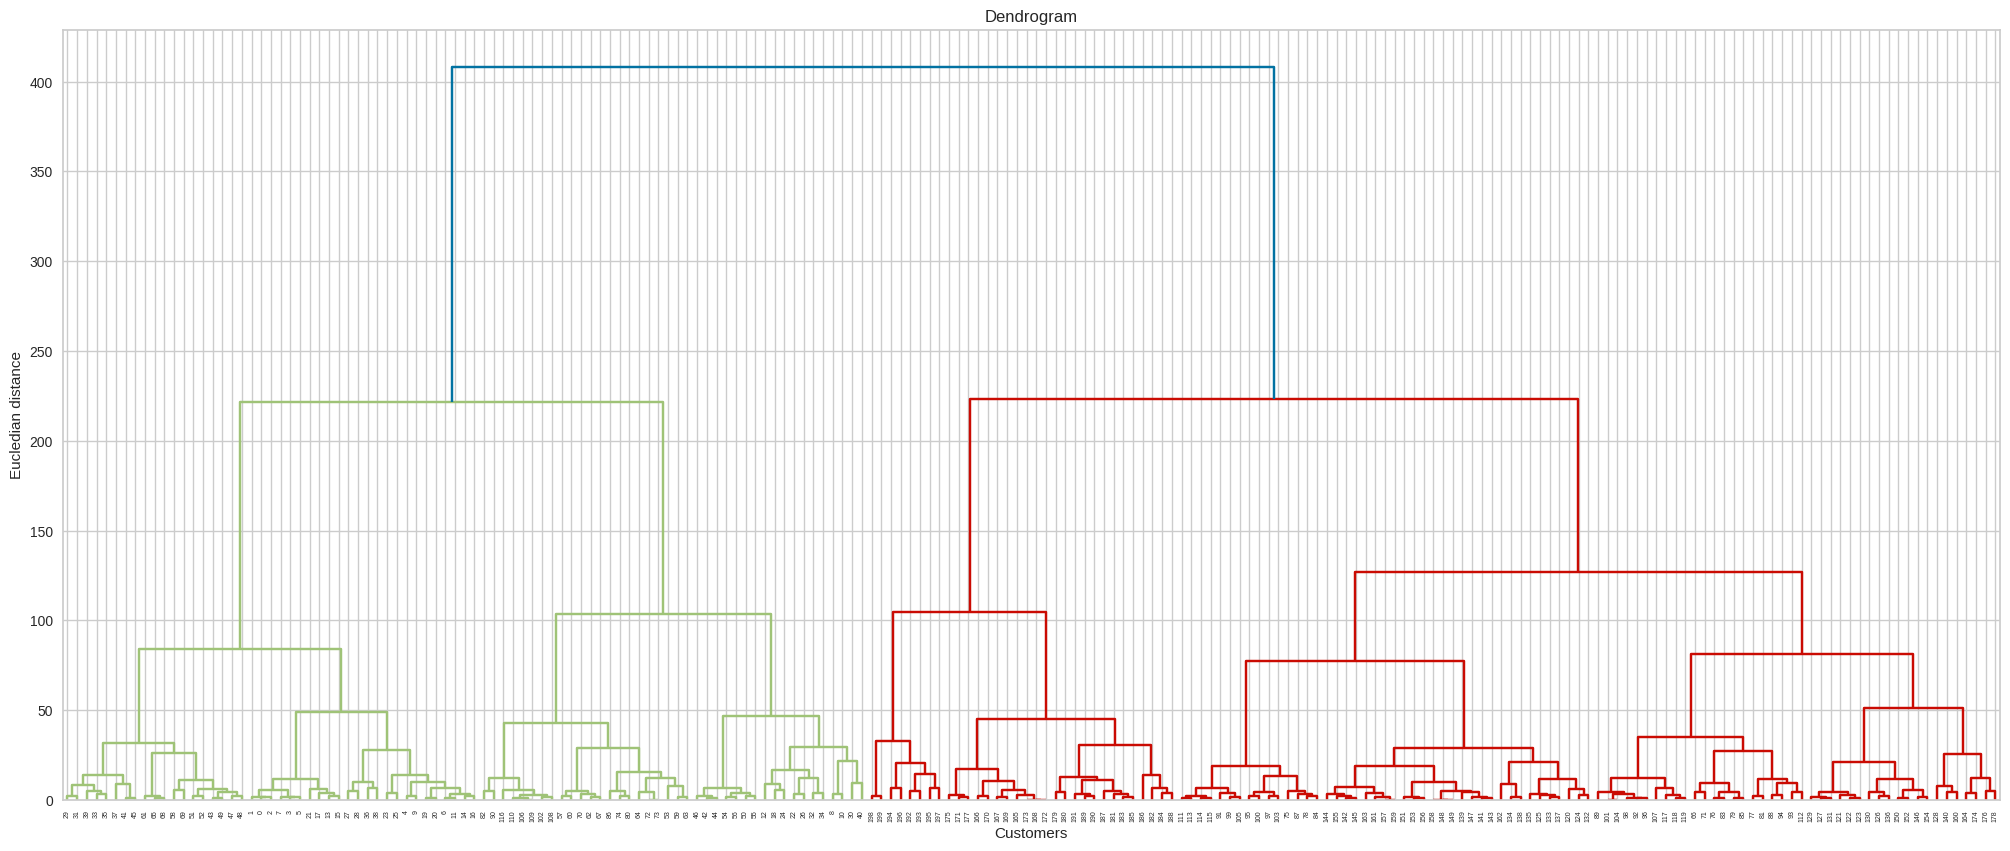

In [ ]:
# Visualising the dendrogram
fig = plt.figure(figsize=(25, 10))
dendrogram=sch.dendrogram(sch.linkage(x2,method='ward'))
plt.title("Dendrogram")
plt.xlabel("Customers")
plt.ylabel("Eucledian distance")
plt.show()

In [ ]:
from sklearn.cluster import AgglomerativeClustering

In [ ]:
# creating object hc of class AgglomerativeClustering()
hc=AgglomerativeClustering(n_clusters=4,affinity="euclidean",linkage="ward")

In [ ]:
# it gives an array which tells as to which data point belongs to which cluster (0,1,2)
y1_hc=hc.fit_predict(x1)

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_agglomerative.py:983: FutureWarning: Attribute `affinity` was deprecated in version 1.2 and will be removed in 1.4. Use `metric` instead
  warnings.warn(


In [ ]:
y1_hc

array([0, 3, 0, 3, 0, 3, 0, 3, 0, 3, 0, 3, 0, 3, 0, 3, 0, 3, 0, 3, 0, 3,
       0, 3, 0, 3, 0, 3, 0, 3, 0, 3, 0, 3, 0, 3, 0, 3, 0, 3, 0, 3, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 2, 0, 2, 1, 2, 1, 2,
       0, 2, 1, 2, 1, 2, 1, 2, 1, 2, 0, 2, 1, 2, 0, 2, 1, 2, 1, 2, 1, 2,
       1, 2, 1, 2, 1, 2, 0, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2,
       1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2,
       1, 2])

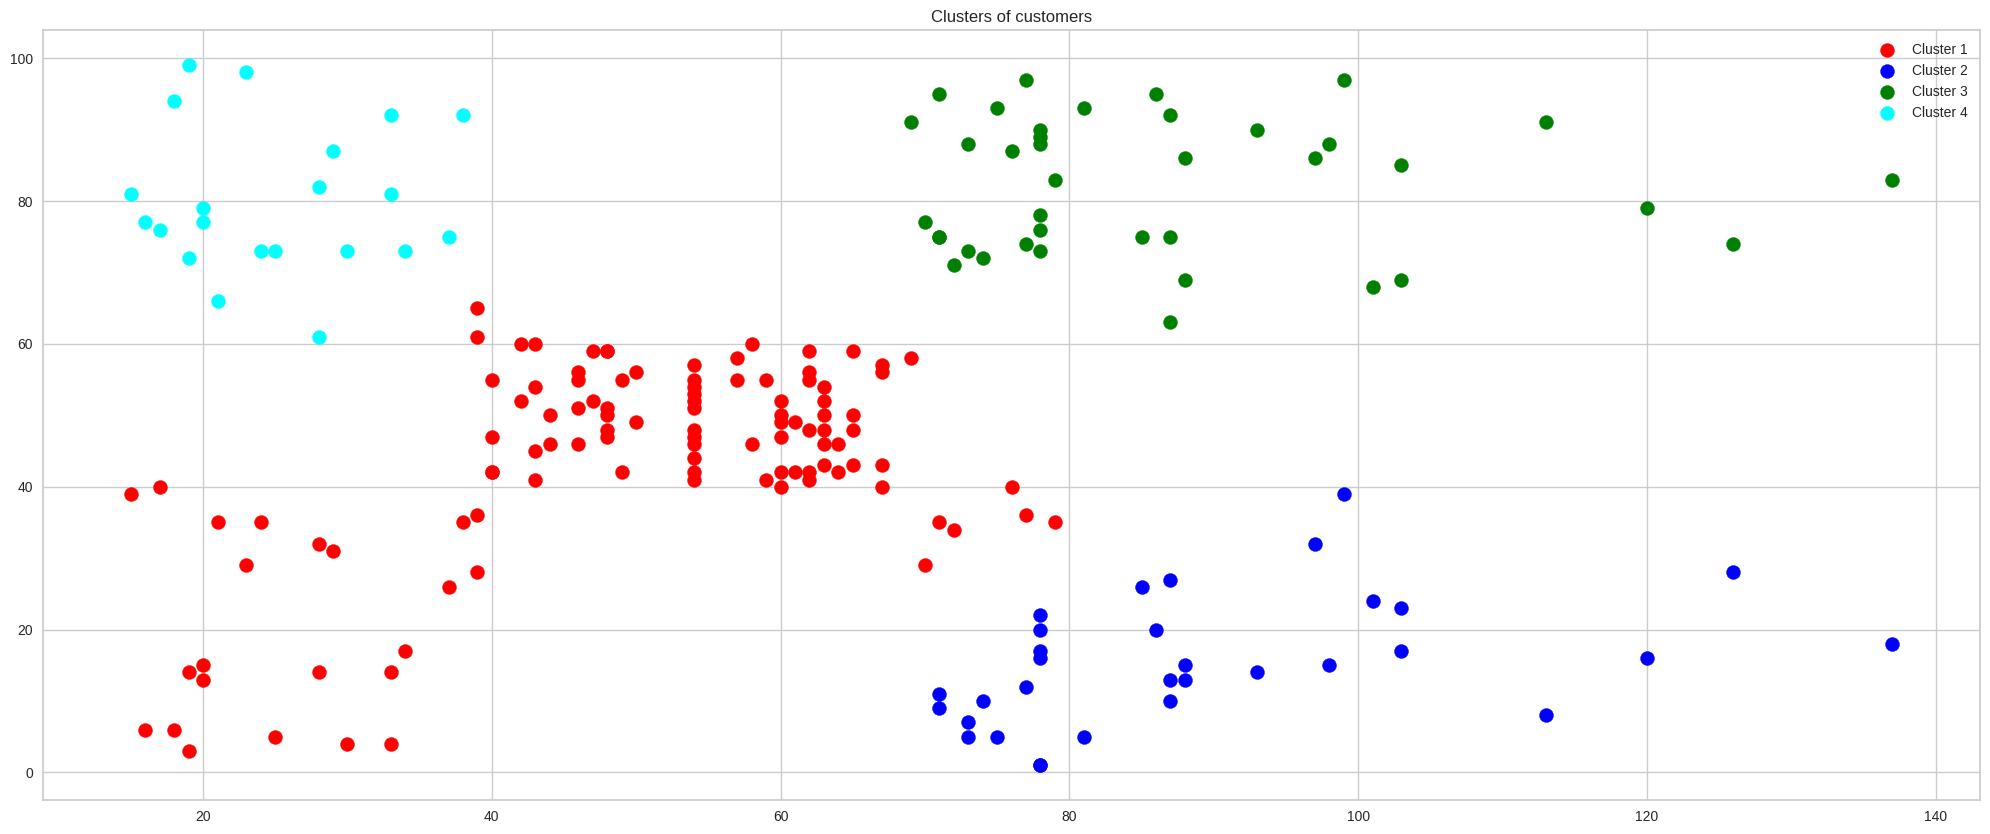

In [ ]:
# Visualising the clusters
fig = plt.figure(figsize=(25, 10))
plt.scatter(x1[y1_hc == 0, 0], x1[y1_hc == 0, 1], s = 100, c = 'red', label = 'Cluster 1')
plt.scatter(x1[y1_hc == 1, 0], x1[y1_hc == 1, 1], s = 100, c = 'blue', label = 'Cluster 2')
plt.scatter(x1[y1_hc == 2, 0], x1[y1_hc == 2, 1], s = 100, c = 'green', label = 'Cluster 3')
plt.scatter(x1[y1_hc == 3, 0], x1[y1_hc == 3, 1], s = 100, c = 'cyan', label = 'Cluster 4')
plt.title('Clusters of customers')
plt.legend()
plt.show()

In [ ]:
y2_hc=hc.fit_predict(x2)

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_agglomerative.py:983: FutureWarning: Attribute `affinity` was deprecated in version 1.2 and will be removed in 1.4. Use `metric` instead
  warnings.warn(


In [ ]:
y2_hc

array([3, 3, 3, 3, 3, 3, 3, 3, 1, 3, 1, 3, 1, 3, 3, 3, 3, 3, 1, 3, 3, 3,
       1, 3, 1, 3, 1, 3, 3, 3, 1, 3, 1, 3, 1, 3, 3, 3, 3, 3, 1, 3, 1, 3,
       1, 3, 1, 3, 3, 3, 1, 3, 3, 1, 1, 1, 1, 1, 3, 1, 1, 3, 1, 1, 1, 3,
       0, 1, 3, 3, 1, 0, 1, 1, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0,
       0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 1,
       1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 2, 2, 2, 2, 2, 2, 2, 2, 0, 2,
       0, 2, 0, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2])

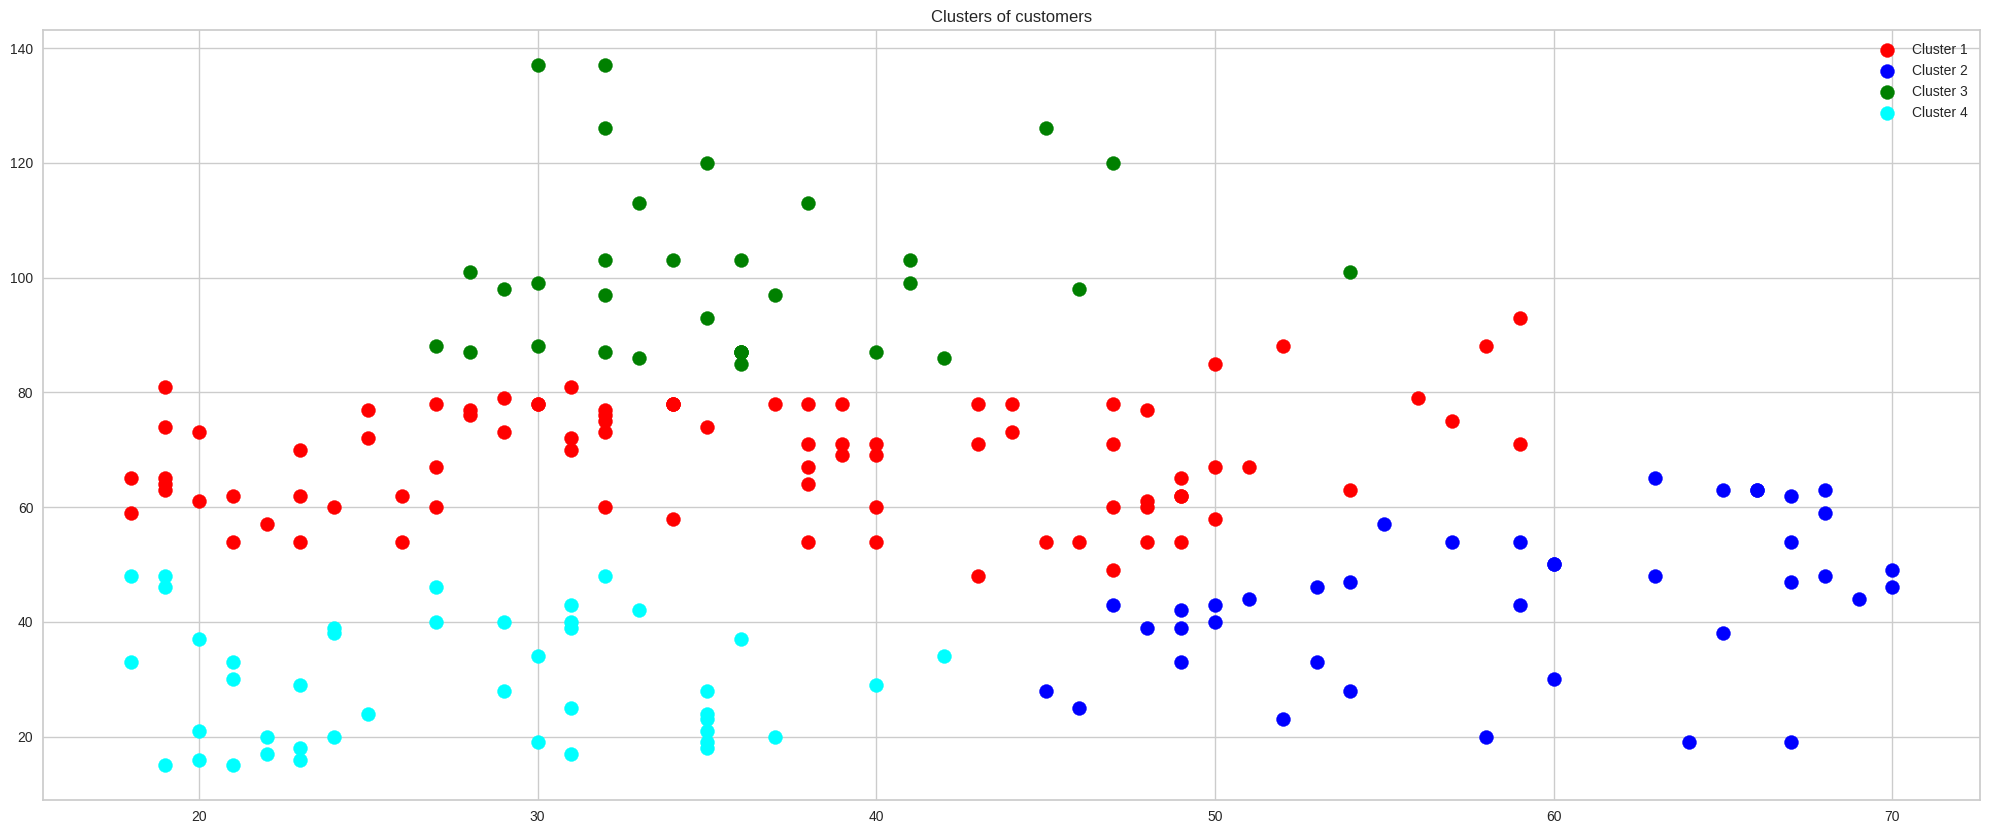

In [ ]:
# Visualising the clusters
fig = plt.figure(figsize=(25, 10))
plt.scatter(x2[y2_hc == 0, 0], x2[y2_hc == 0, 1], s = 100, c = 'red', label = 'Cluster 1')
plt.scatter(x2[y2_hc == 1, 0], x2[y2_hc == 1, 1], s = 100, c = 'blue', label = 'Cluster 2')
plt.scatter(x2[y2_hc == 2, 0], x2[y2_hc == 2, 1], s = 100, c = 'green', label = 'Cluster 3')
plt.scatter(x2[y2_hc == 3, 0], x2[y2_hc == 3, 1], s = 100, c = 'cyan', label = 'Cluster 4')
plt.title('Clusters of customers')
plt.legend()
plt.show()